In [2]:
import pandas as pd
import numpy as np

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')
train_calendar = pd.read_csv('./data/train_calendar.csv')
test_calendar = pd.read_csv('./data/test_calendar.csv')

In [4]:
train['date'] = pd.to_datetime(train['date'])
test['date'] = pd.to_datetime(test['date'])

In [5]:
train.head()

,warehouse,date,orders,holiday_name,holiday,shutdown,mini_shutdown,shops_closed,winter_school_holidays,school_holidays,blackout,mov_change,frankfurt_shutdown,precipitation,snow,user_activity_1,user_activity_2,id
0,Prague_1,2020-12-05,6895.0,NaN,0,0,0,0,0,0,0,0.0,0,0.0,0.0,1722.0,32575.0,Prague_1_2020-12-05
1,Prague_1,2020-12-06,6584.0,NaN,0,0,0,0,0,0,0,0.0,0,0.0,0.0,1688.0,32507.0,Prague_1_2020-12-06
2,Prague_1,2020-12-07,7030.0,NaN,0,0,0,0,0,0,0,0.0,0,0.0,0.0,1696.0,32552.0,Prague_1_2020-12-07
3,Prague_1,2020-12-08,6550.0,NaN,0,0,0,0,0,0,0,0.0,0,0.8,0.0,1681.0,32423.0,Prague_1_2020-12-08
4,Prague_1,2020-12-09,6910.0,NaN,0,0,0,0,0,0,0,0.0,0,0.5,0.0,1704.0,32410.0,Prague_1_2020-12-09


In [6]:
train.shape
train.date.max()-train.date.min()
train.isna().sum()
train.nunique()

(7340, 18)

Timedelta('1196 days 00:00:00')

warehouse                    0
date                         0
orders                       0
holiday_name              7122
holiday                      0
shutdown                     0
mini_shutdown                0
shops_closed                 0
winter_school_holidays       0
school_holidays              0
blackout                     0
mov_change                   0
frankfurt_shutdown           0
precipitation              270
snow                       270
user_activity_1              0
user_activity_2              0
id                           0
dtype: int64

warehouse                    7
date                      1193
orders                    4426
holiday_name                24
holiday                      2
shutdown                     2
mini_shutdown                2
shops_closed                 2
winter_school_holidays       2
school_holidays              2
blackout                     2
mov_change                   3
frankfurt_shutdown           2
precipitation              772
snow                       158
user_activity_1           1135
user_activity_2           6147
id                        7340
dtype: int64

In [7]:
test.shape
test.isna().sum()
test.nunique()

(397, 8)

warehouse                   0
date                        0
holiday_name              380
holiday                     0
shops_closed                0
winter_school_holidays      0
school_holidays             0
id                          0
dtype: int64

warehouse                   7
date                       61
holiday_name                5
holiday                     2
shops_closed                2
winter_school_holidays      2
school_holidays             2
id                        397
dtype: int64

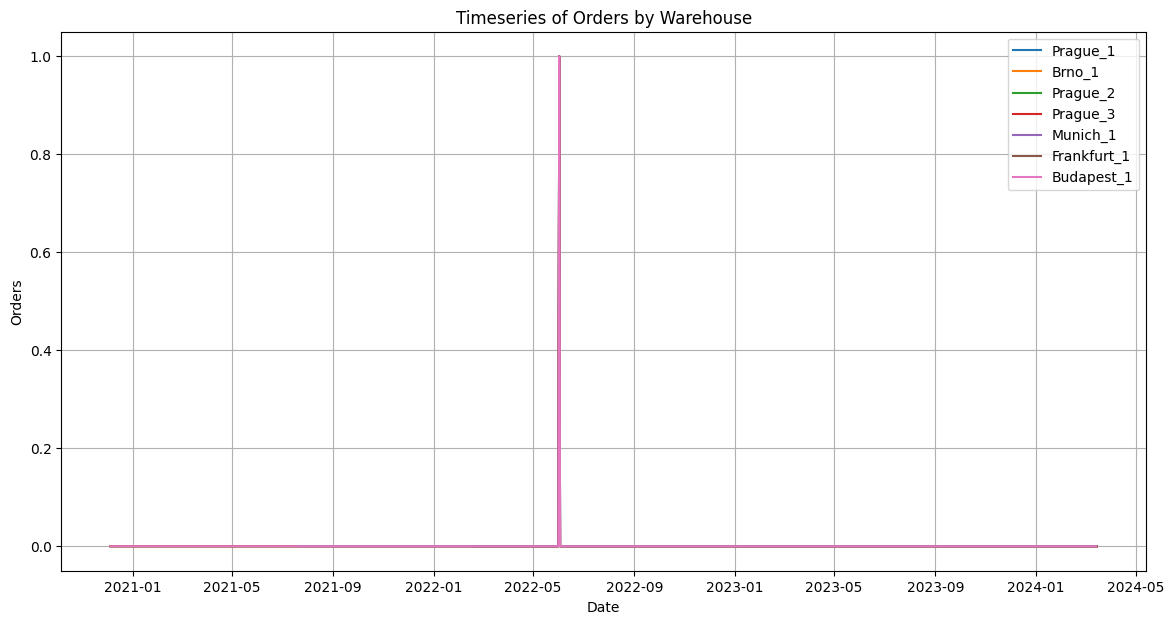

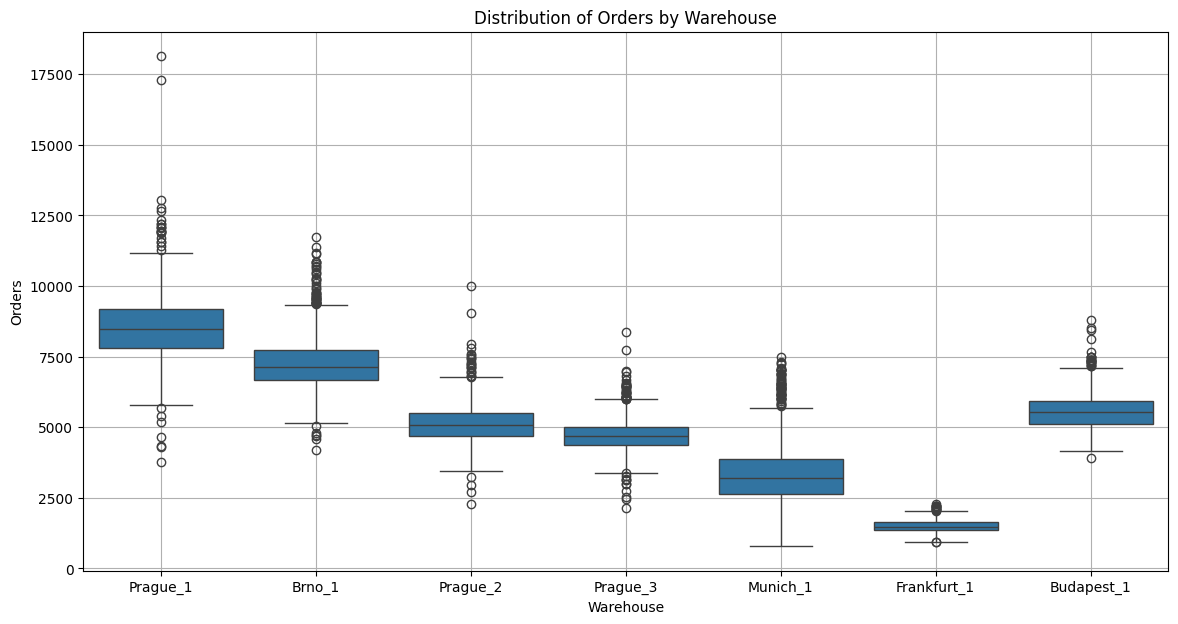

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the timeseries of orders by warehouse
plt.figure(figsize=(14, 7))
for warehouse in train['warehouse'].unique():
    warehouse_data = train[train['warehouse'] == warehouse]
    plt.plot(warehouse_data['date'], warehouse_data['blackout'], label=warehouse)

plt.xlabel('Date')
plt.ylabel('Orders')
plt.title('Timeseries of Orders by Warehouse')
plt.legend()
plt.grid(True)
plt.show();

# Show the distribution of orders by warehouse
plt.figure(figsize=(14, 7))
sns.boxplot(x='warehouse', y='orders', data=train)
plt.xlabel('Warehouse')
plt.ylabel('Orders')
plt.title('Distribution of Orders by Warehouse')
plt.grid(True)
plt.show();

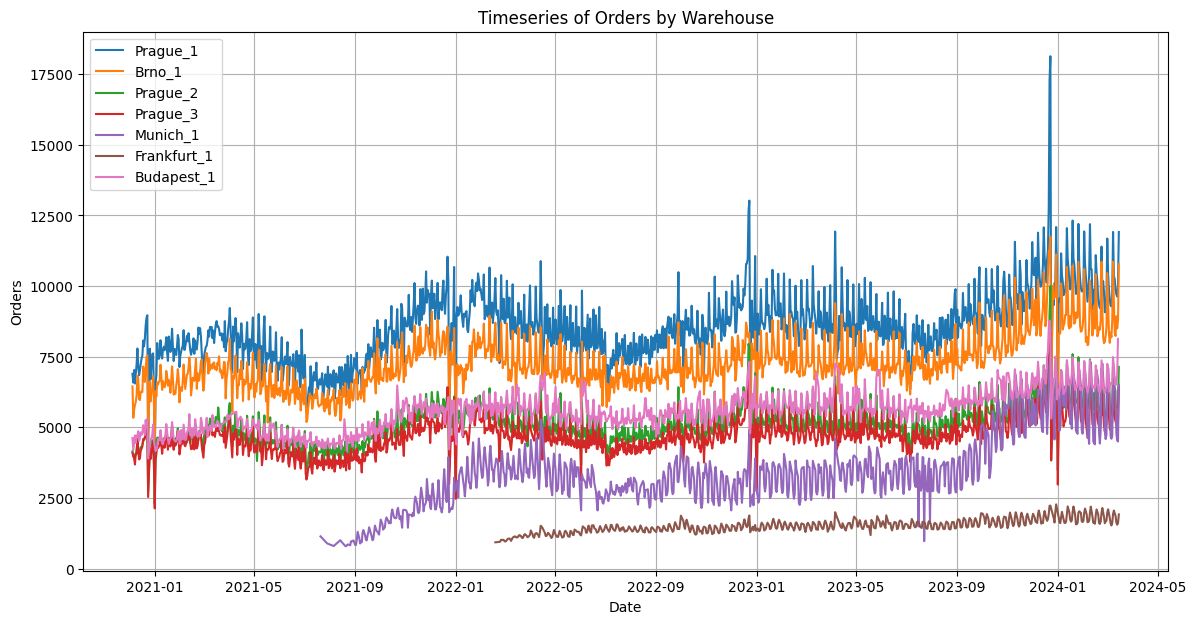

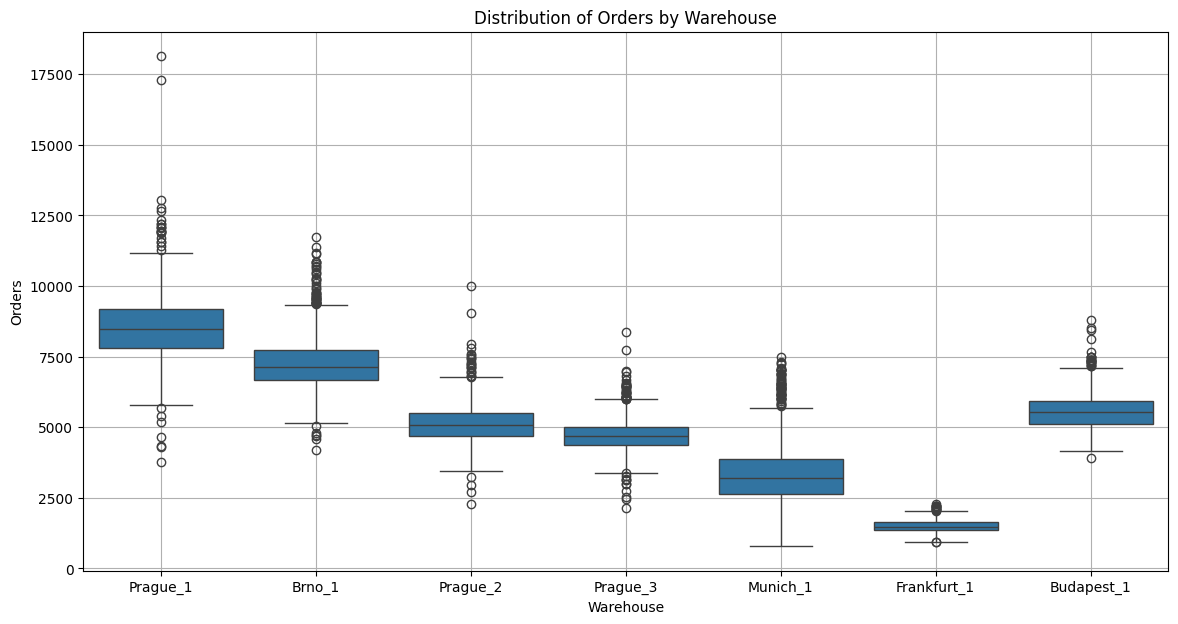

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the timeseries of orders by warehouse
plt.figure(figsize=(14, 7))
for warehouse in train['warehouse'].unique():
    warehouse_data = train[train['warehouse'] == warehouse]
    plt.plot(warehouse_data['date'], warehouse_data['orders'], label=warehouse)

plt.xlabel('Date')
plt.ylabel('Orders')
plt.title('Timeseries of Orders by Warehouse')
plt.legend()
plt.grid(True)
plt.show();

# Show the distribution of orders by warehouse
plt.figure(figsize=(14, 7))
sns.boxplot(x='warehouse', y='orders', data=train)
plt.xlabel('Warehouse')
plt.ylabel('Orders')
plt.title('Distribution of Orders by Warehouse')
plt.grid(True)
plt.show();


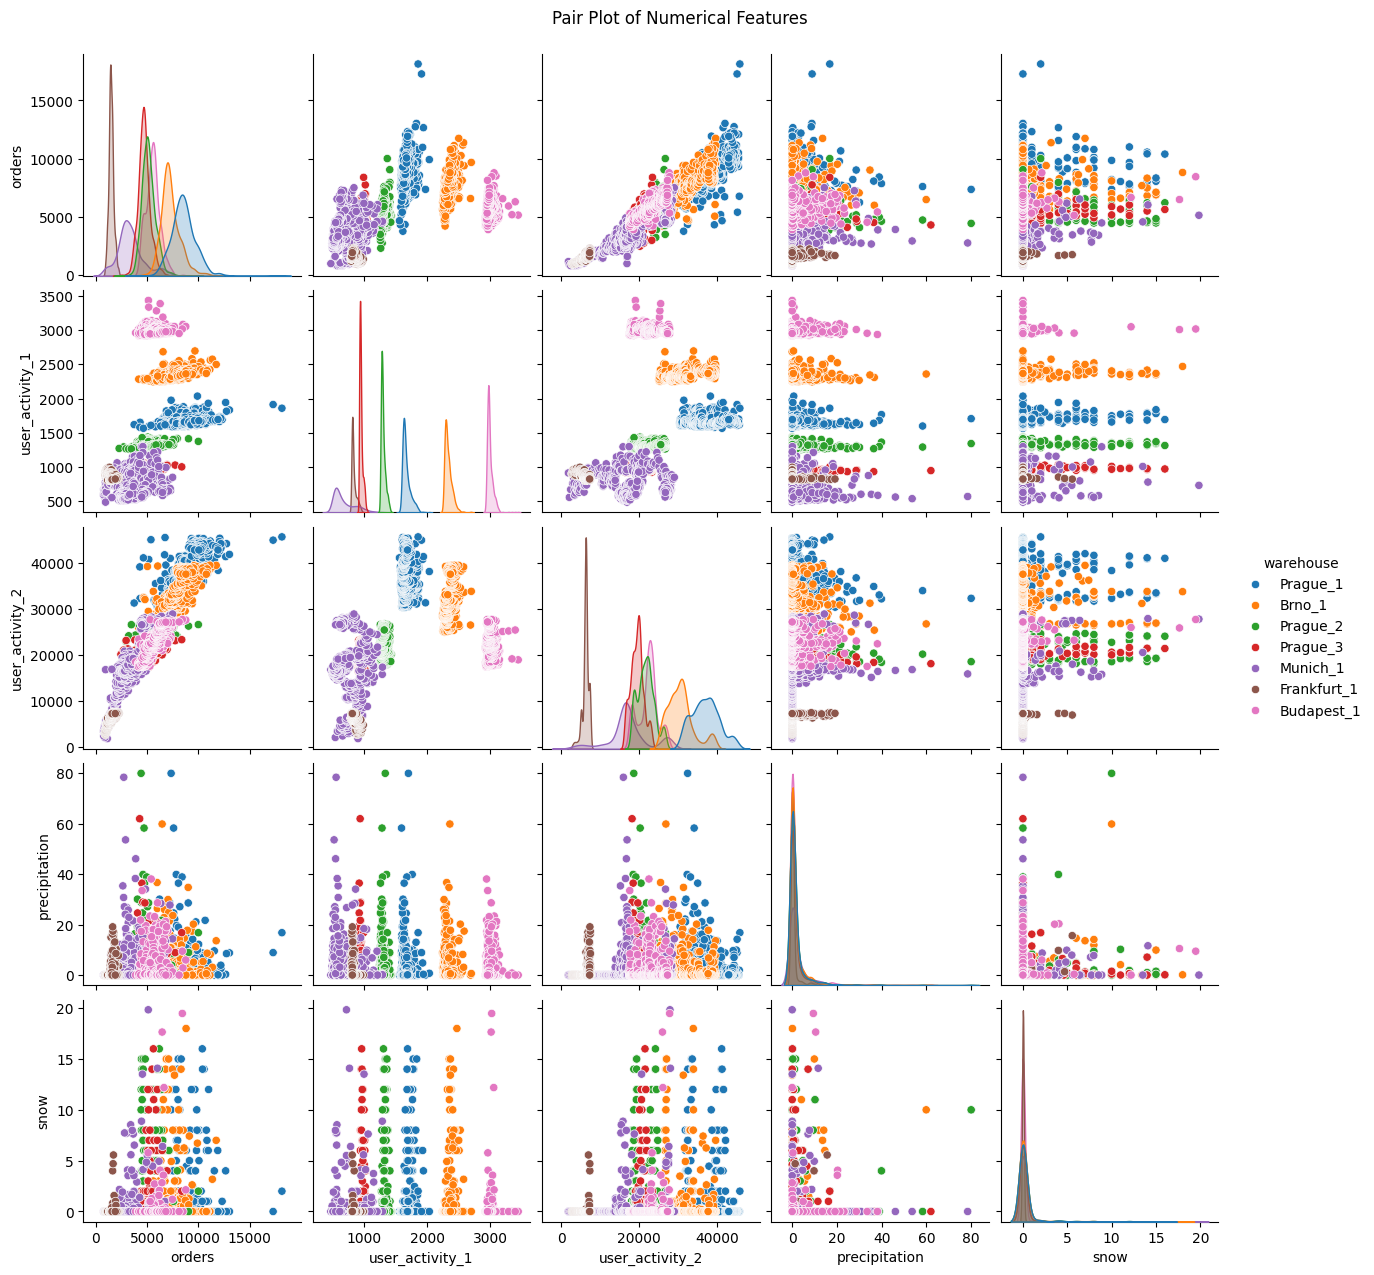

In [34]:
sns.pairplot(train, hue='warehouse', vars=['orders', 'user_activity_1', 'user_activity_2', 'precipitation', 'snow'])
plt.suptitle('Pair Plot of Numerical Features', y=1.02)
plt.show();

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

Text(0.5, 1.0, 'Autocorrelation Plot for Prague_1')

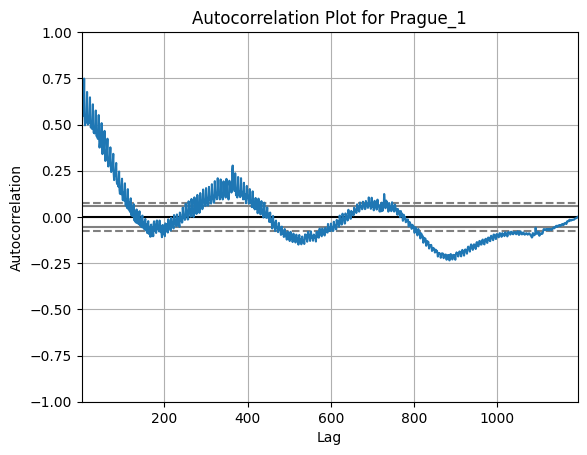

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

Text(0.5, 1.0, 'Autocorrelation Plot for Brno_1')

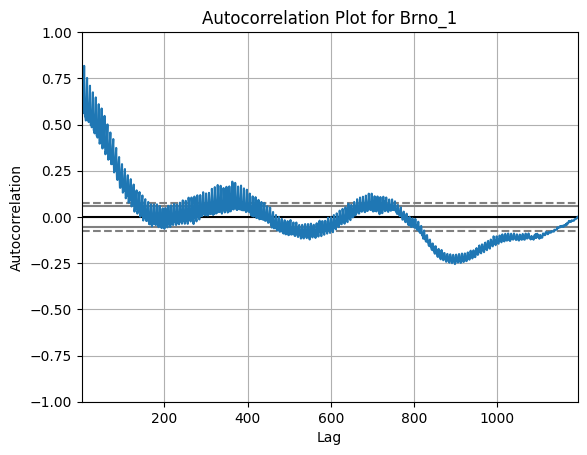

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

Text(0.5, 1.0, 'Autocorrelation Plot for Prague_2')

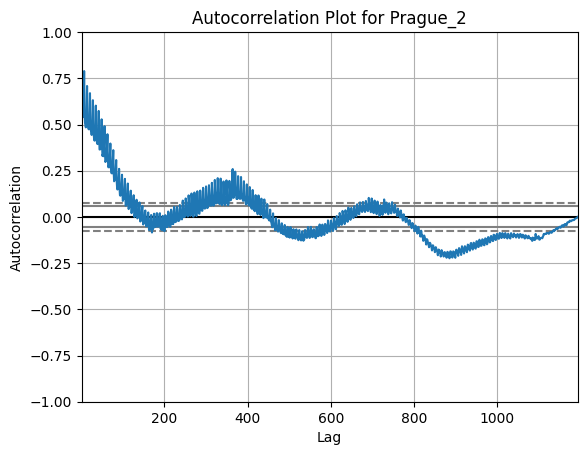

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

Text(0.5, 1.0, 'Autocorrelation Plot for Prague_3')

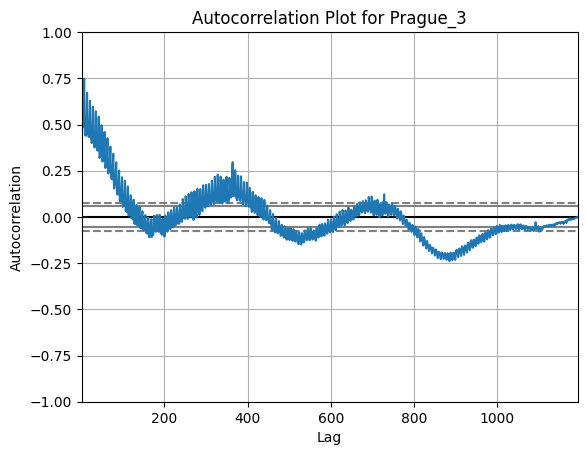

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

Text(0.5, 1.0, 'Autocorrelation Plot for Munich_1')

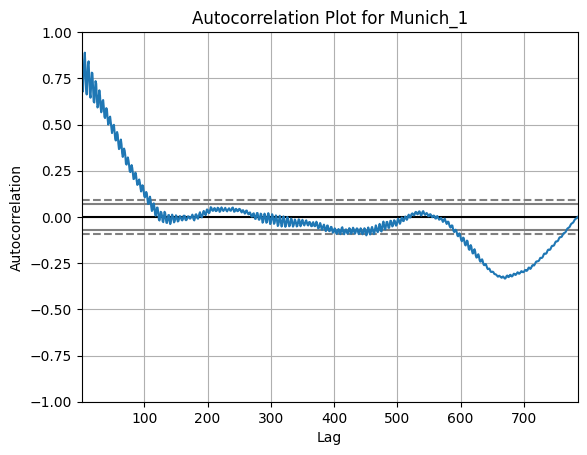

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

Text(0.5, 1.0, 'Autocorrelation Plot for Frankfurt_1')

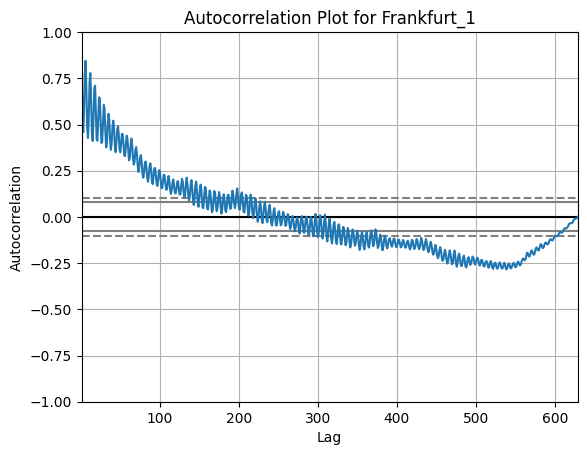

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

Text(0.5, 1.0, 'Autocorrelation Plot for Budapest_1')

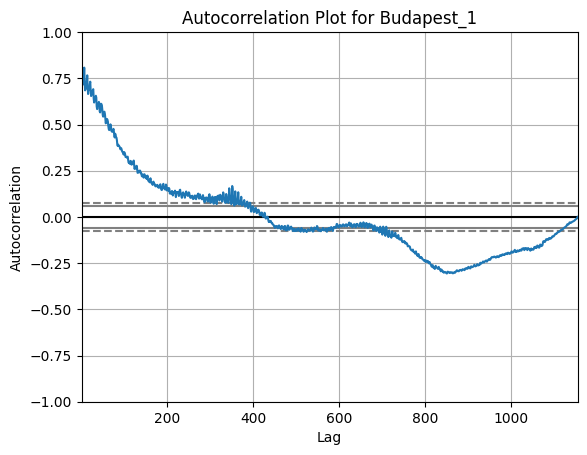

In [48]:
from pandas.plotting import autocorrelation_plot

# plt.figure(figsize=(14, 7))
for warehouse in train['warehouse'].unique():
    warehouse_data = train[train['warehouse'] == warehouse]
    # plt.figure()
    autocorrelation_plot(warehouse_data['orders']);
    plt.title(f'Autocorrelation Plot for {warehouse}')
    plt.show()

<Figure size 1400x700 with 0 Axes>

<Axes: xlabel='warehouse', ylabel='orders'>

Text(0.5, 0, 'Warehouse')

Text(0, 0.5, 'Orders')

Text(0.5, 1.0, 'Violin Plot of Orders by Warehouse')

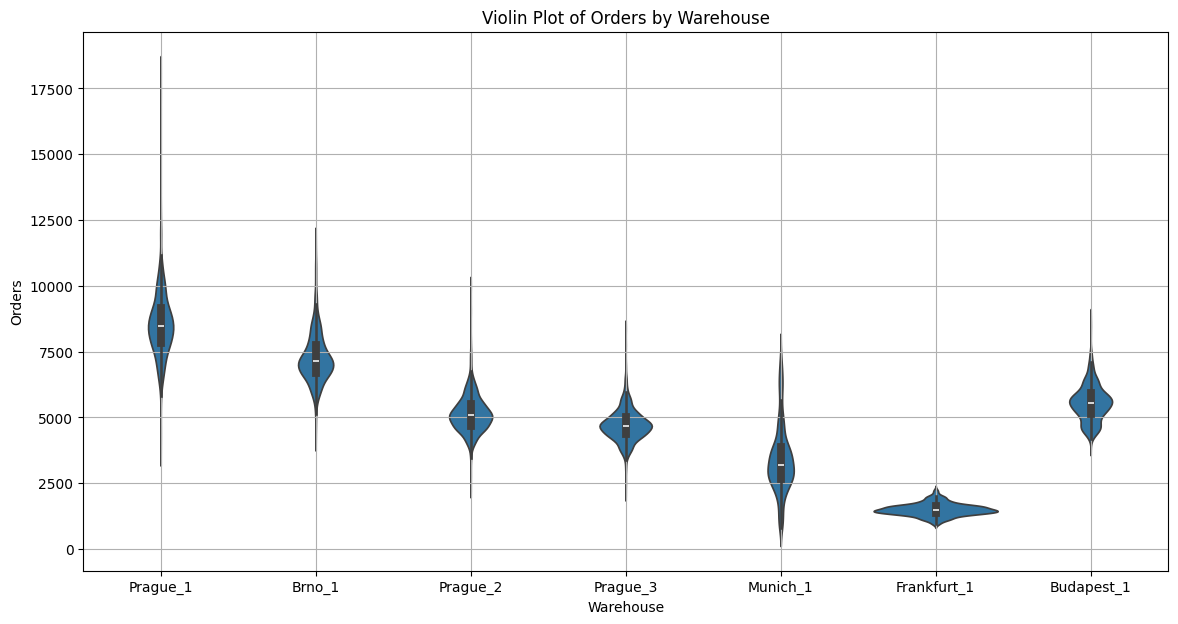

In [50]:
plt.figure(figsize=(14, 7))
sns.violinplot(x='warehouse', y='orders', data=train)
plt.xlabel('Warehouse')
plt.ylabel('Orders')
plt.title('Violin Plot of Orders by Warehouse')
plt.grid(True)
plt.show()

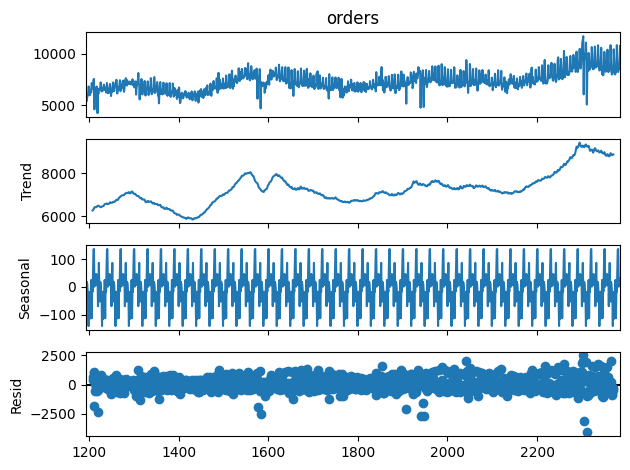

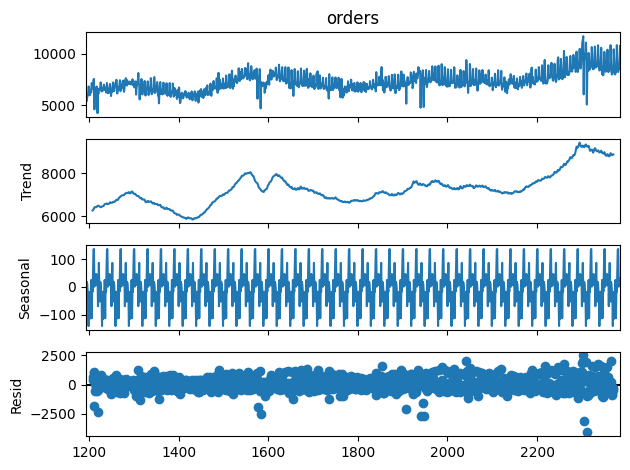

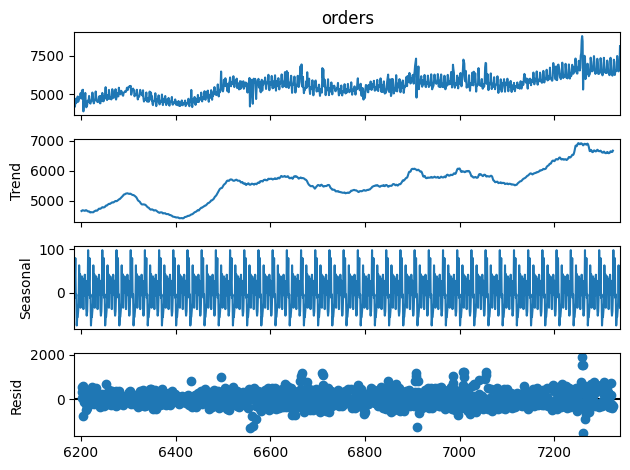

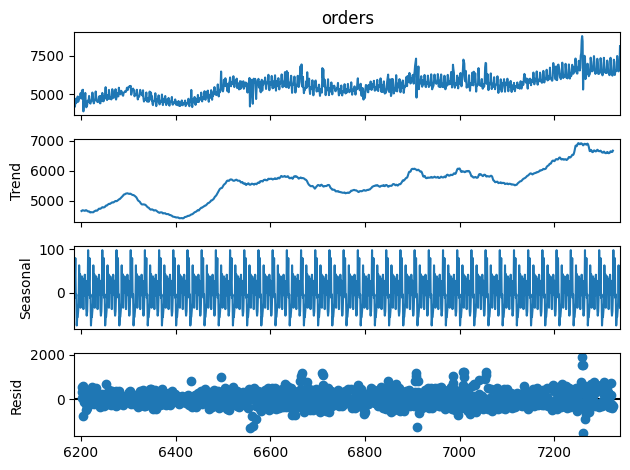

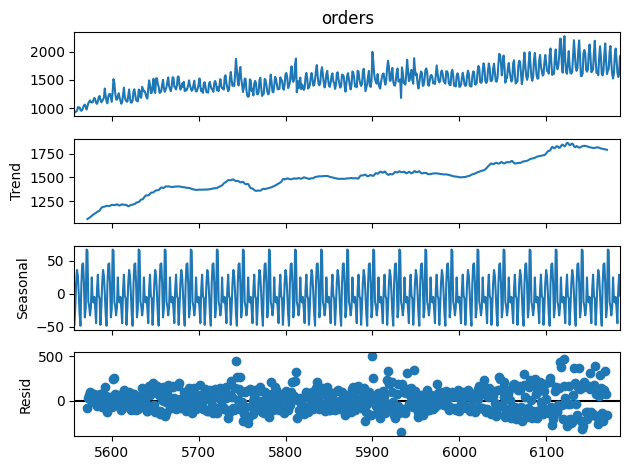

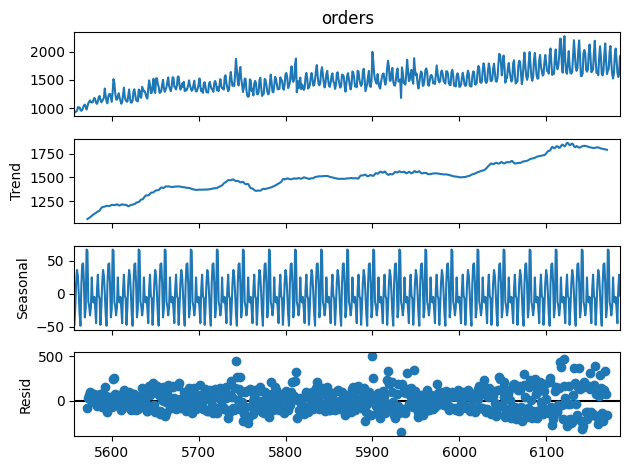

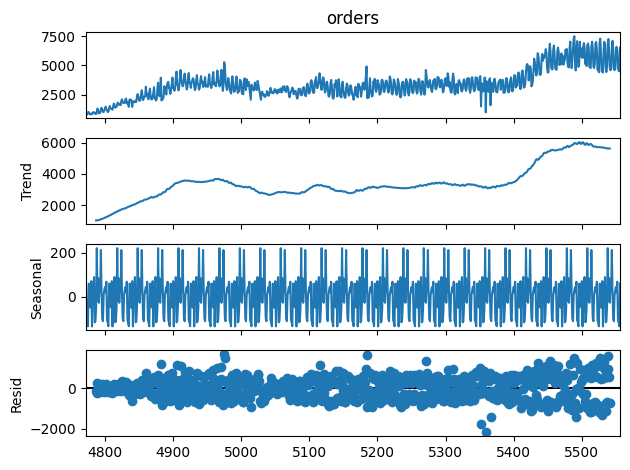

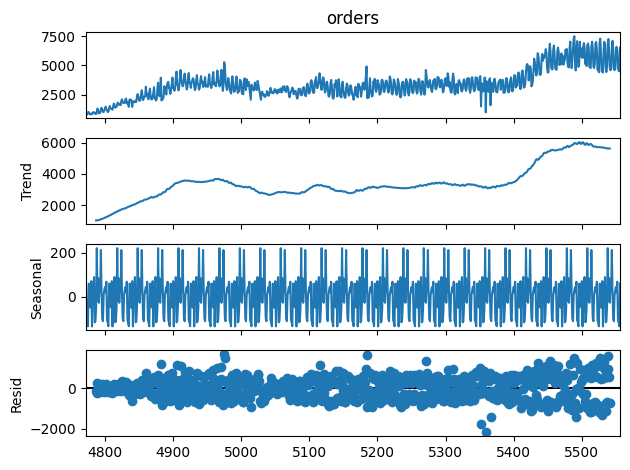

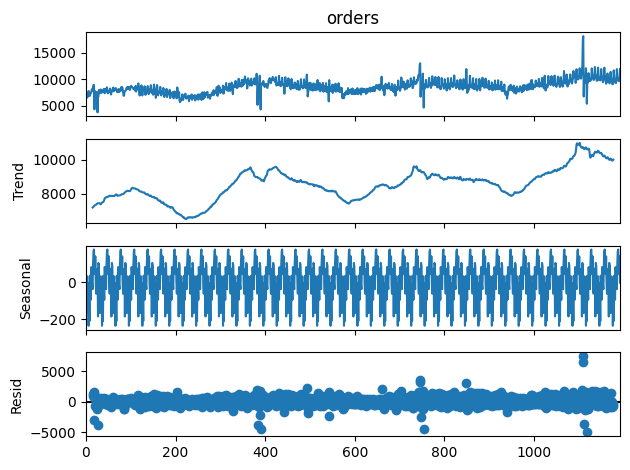

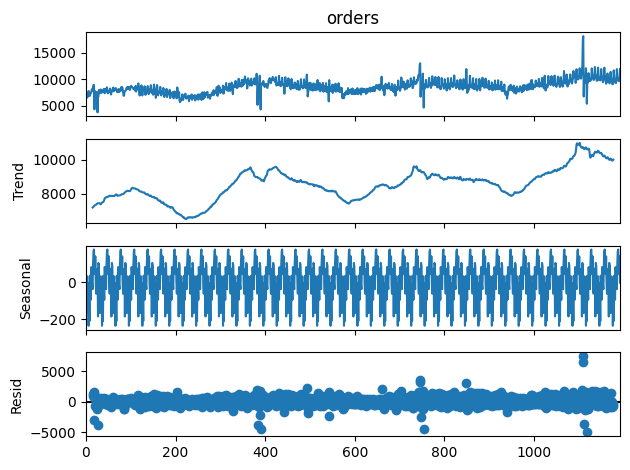

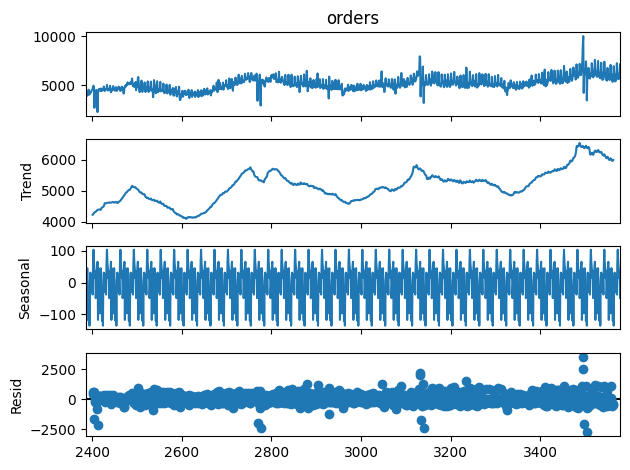

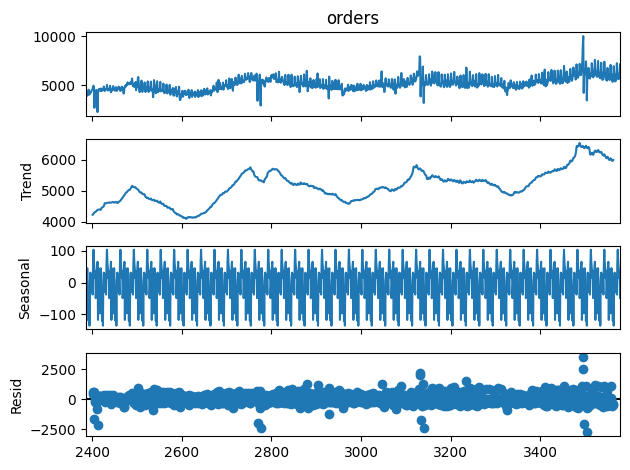

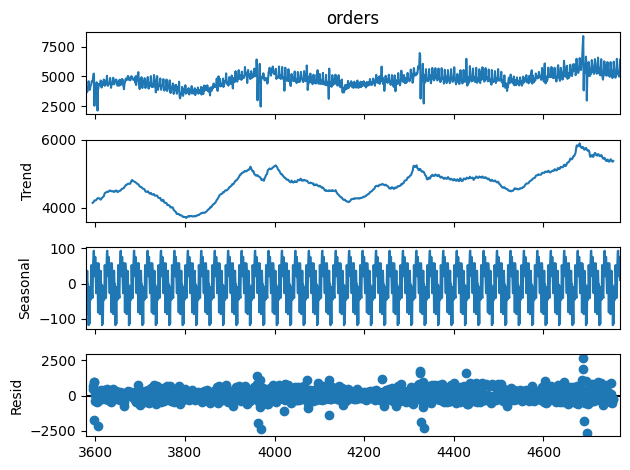

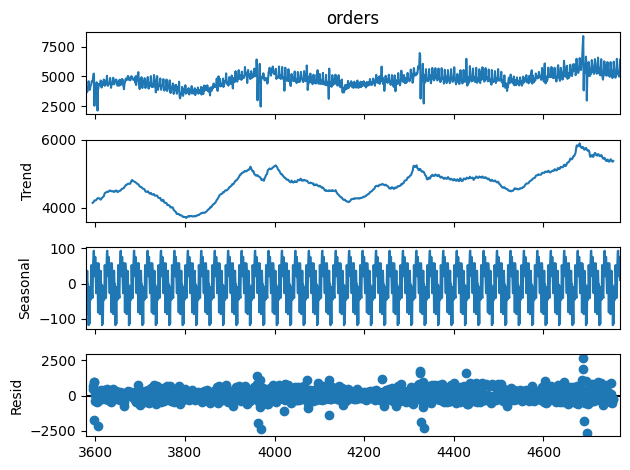

In [28]:
from statsmodels.tsa.seasonal import seasonal_decompose

for warehouse in sorted(train['warehouse'].unique()):
    warehouse_data = train[train['warehouse'] == warehouse]
    decomposition = seasonal_decompose(warehouse_data['orders'], model='additive', period=30)
    # print(warehouse.upper())
    decomposition.plot()
    plt.show();
